# Análise de Transações

In [71]:
# Importa as bibliotecas necessárias para a exploração do dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# Carregar dados do arquivo 'contas'
contas_df = pd.read_csv('/content/contas.csv')

In [73]:
# Carregar dados do arquivo 'transacoes'
transacoes_df = pd.read_csv('/content/transacoes.csv')

In [74]:
# Carregar dados do arquivo 'agencias'
agencias_df = pd.read_csv('/content/agencias.csv')

In [75]:
# Carregar dados do arquivo 'clientes'
clientes_df = pd.read_csv('/content/clientes.csv')

### Calcular o volume médio de transações por agência

In [ ]:
# Mesclar os dois conjuntos de dados (contas, transações) com base na coluna 'num_conta'
merged_df = pd.merge(transacoes_df, contas_df, on='num_conta')

In [ ]:
# Mesclar o resultado anterior com o conjunto de dados 'agencias' com base na coluna 'cod_agencia'
final_merged_df = pd.merge(merged_df, agencias_df[['cod_agencia','uf']], on='cod_agencia')

In [ ]:
# Mesclar o resultado anterior com o conjunto de dados 'agencias' com base na coluna 'cod_agencia'
final_merged_df = pd.merge(merged_df, agencias_df[['cod_agencia','uf']], on='cod_agencia'

In [ ]:
# Ordenar o resultado em ordem decrescente
media_transacoes_por_agencia = media_transacoes_por_agencia.sort_values(ascending=False)

In [ ]:
# Arredondar os valores para duas casas decimais
media_transacoes_por_agencia = media_transacoes_por_agencia.round(2)

In [ ]:
# Exibir o resultado
media_transacoes_por_agencia

cod_agencia  uf
2            SP    446.39
1            SP    412.30
5            RS    358.77
3            SP    356.95
7            SP    349.12
6            RJ    306.71
4            SP    303.83
10           PE    301.94
9            SC    297.67
8            SP    227.42
Name: valor_transacao, dtype: float64

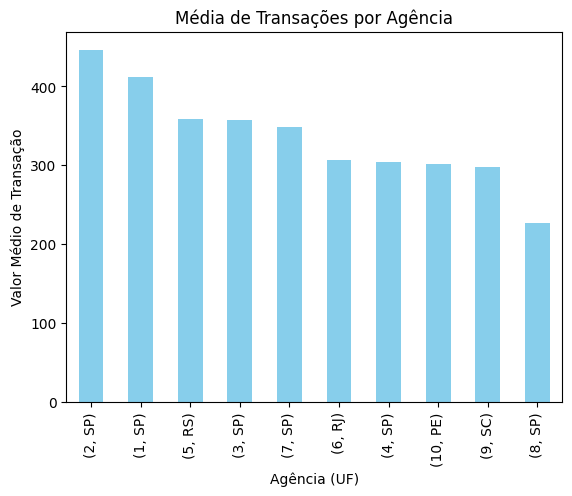

In [ ]:
# Criar um gráfico de barras
media_transacoes_por_agencia.plot(kind='bar', color='skyblue')
plt.title('Média de Transações por Agência')
plt.xlabel('Agência (UF)')
plt.ylabel('Valor Médio de Transação')
plt.show()

### Calcular o número de clientes por agência

In [ ]:
# Mesclar os conjuntos de dados com base na coluna 'num_conta' e 'cod_agencia'
merged_df = pd.merge(transacoes_df, contas_df, on='num_conta')
final_merged_df = pd.merge(merged_df, agencias_df[['cod_agencia','uf','cidade']], on='cod_agencia')

In [ ]:
# Calcular o número de clientes por agência
clientes_por_agencia = final_merged_df.groupby(['cod_agencia','uf','cidade'])['num_conta'].nunique()

In [ ]:
# Ordenar os resultados em ordem decrescente
clientes_por_agencia = clientes_por_agencia.sort_values(ascending=False)

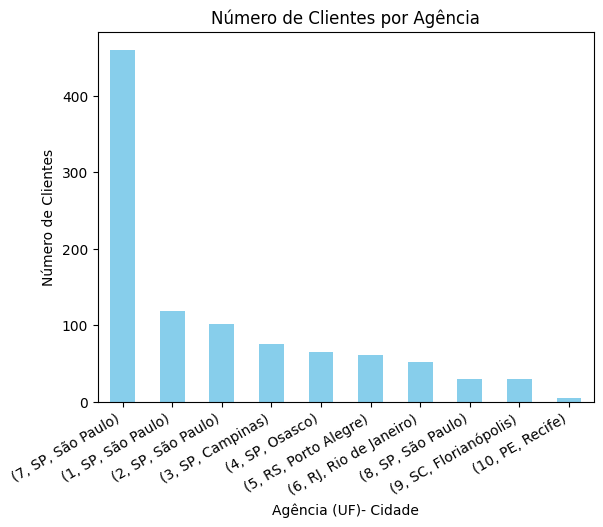

In [ ]:
# Criar um gráfico de barras
clientes_por_agencia.plot(kind='bar', color='skyblue')
plt.title('Número de Clientes por Agência')
plt.xlabel('Agência (UF)- Cidade')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=30, ha='right')
plt.show()

### Qual é a sazonalidade nas transações?

In [ ]:
transacoes = pd.read_csv('/content/transacoes.csv', parse_dates=['data_transacao'])

In [ ]:
# Agrupar por mês e contar o número de transações
transacoes_por_mes = transacoes.resample('M', on='data_transacao').size()

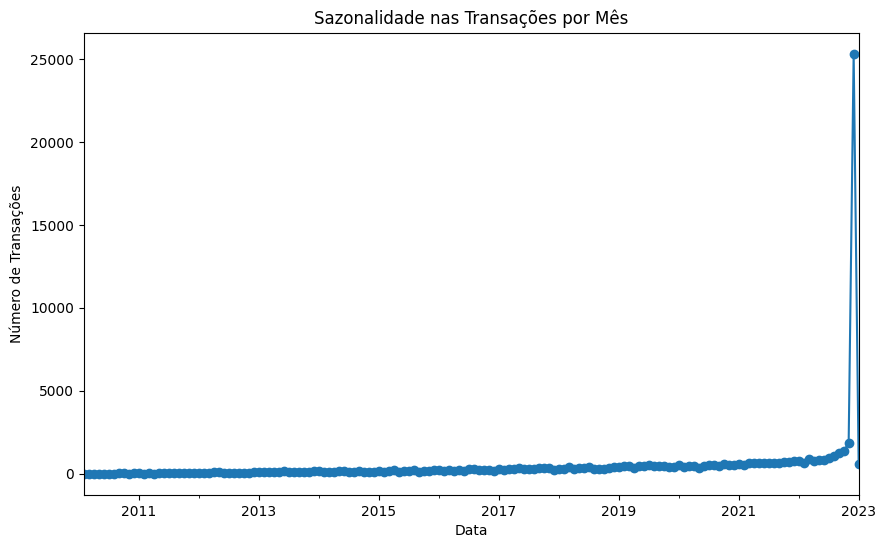

In [ ]:
# Plotar gráfico de linha para visualizar a sazonalidade
transacoes_por_mes.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Sazonalidade nas Transações por Mês')
plt.xlabel('Data')
plt.ylabel('Número de Transações')
plt.show()

### Quais são os principais produtos ou serviços associados a transações de alto valor?

In [ ]:
transacoes_alto_valor = transacoes[transacoes['valor_transacao'] > 500]

In [ ]:
# Analisar os produtos ou serviços associados a transações de alto valor
produtos_top = transacoes_alto_valor['nome_transacao'].value_counts()
print('Principais produtos ou serviços em transações de alto valor:')
produtos_top

Principais produtos ou serviços em transações de alto valor:


Pix - Recebido                      2090
TED - Recebido                       979
DOC - Recebido                       402
Transferência entre CC - Crédito     186
Depósito em espécie                  103
Estorno de Debito                      1
Name: nome_transacao, dtype: int64

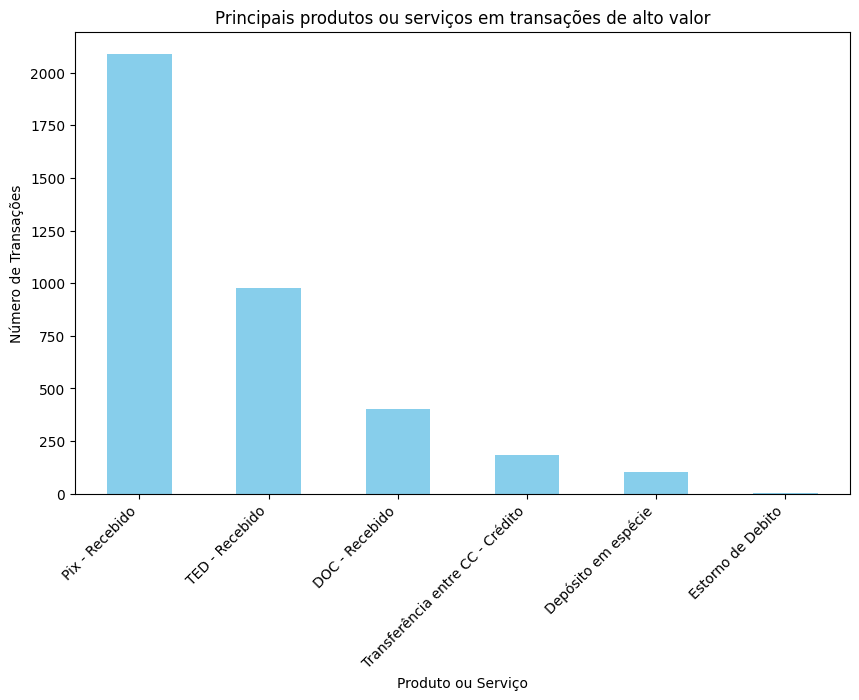

In [ ]:
# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
produtos_top.plot(kind='bar', color='skyblue')
plt.title('Principais produtos ou serviços em transações de alto valor')
plt.xlabel('Produto ou Serviço')
plt.ylabel('Número de Transações')
plt.xticks(rotation=45, ha='right')  # Rotacione os rótulos do eixo x para facilitar a leitura
plt.show()

### Qual foi o impacto do PIX nas transações e no comportamento dos clientes?

In [ ]:
# Data de implementação do PIX
data_pix = '2022-01-01'

In [ ]:
# Convertendo a coluna 'data_transacao' para o tipo datetime
transacoes['data_transacao'] = pd.to_datetime(transacoes['data_transacao'])

In [ ]:
# Ajustar a lógica de filtro para transações do tipo 'Pix' (case-insensitive)
transacoes_pix = transacoes[transacoes['nome_transacao'].str.lower().str.contains('pix')]

In [ ]:
# Verificar se há transações antes e depois da data do PIX
transacoes_antes_pix = transacoes_pix[transacoes_pix['data_transacao'] < data_pix]
transacoes_depois_pix = transacoes_pix[transacoes_pix['data_transacao'] >= data_pix]

In [ ]:
# Calcular a média de transações antes e depois do PIX
media_antes_pix = transacoes_antes_pix['valor_transacao'].mean().round(2)
media_depois_pix = transacoes_depois_pix['valor_transacao'].mean().round(2)

In [ ]:
# Exibir o resultado
print(f'Média de transações antes do PIX: {media_antes_pix}')
print(f'Média de transações depois do PIX: {media_depois_pix}')

Média de transações antes do PIX: -203.0
Média de transações depois do PIX: -202.08


In [ ]:
# Valores das médias
# Converte os valores para positivo, pois transaçoes de saque são negativas
media_antes_pix = 203.0
media_depois_pix = 202.08

# Categorias
categorias = ['Antes do PIX', 'Depois do PIX']

# Valores das médias correspondentes
valores_medias = [media_antes_pix, media_depois_pix]

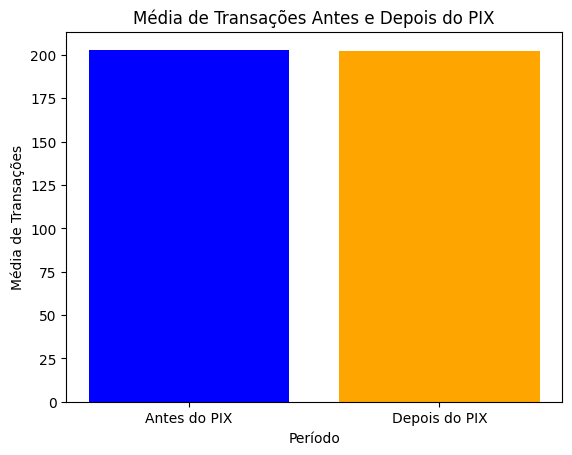

In [ ]:
# Criar gráfico de barras
plt.bar(categorias, valores_medias, color=['blue', 'orange'])

# Adicionar rótulos e título
plt.xlabel('Período')
plt.ylabel('Média de Transações')
plt.title('Média de Transações Antes e Depois do PIX')

# Exibir o gráfico
plt.show()

### Existe uma mudança perceptível nas preferências de pagamento antes e depois da implementação do PIX?

In [ ]:
import seaborn as sns

In [ ]:
transacoes['nome_transacao'] = transacoes['nome_transacao'].str.lower()

In [ ]:
# Filtrar transações relacionadas ao PIX
transacoes_pix = transacoes[transacoes['nome_transacao'].str.contains('pix')].copy()

In [ ]:
# Adicionar uma coluna indicando se a transação ocorreu antes ou depois da implementação do PIX
data_pix = '2022-01-01'  # Data de implementação do PIX
transacoes_pix['pix_implantado'] = (transacoes_pix['data_transacao'] >= data_pix).astype(int)

In [ ]:
# Contar a quantidade de transações por forma de pagamento antes e depois do PIX
contagem_forma_pagamento = transacoes_pix.groupby(['pix_implantado', 'nome_transacao']).size().unstack()

In [ ]:
contagem_forma_pagamento.columns

Index(['pix - realizado', 'pix - recebido', 'pix saque'], dtype='object', name='nome_transacao')

<ipython-input-36-1712f9c5767f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=contagem_forma_pagamento, x='pix_implantado', y=contagem_forma_pagamento.index, ci=None)


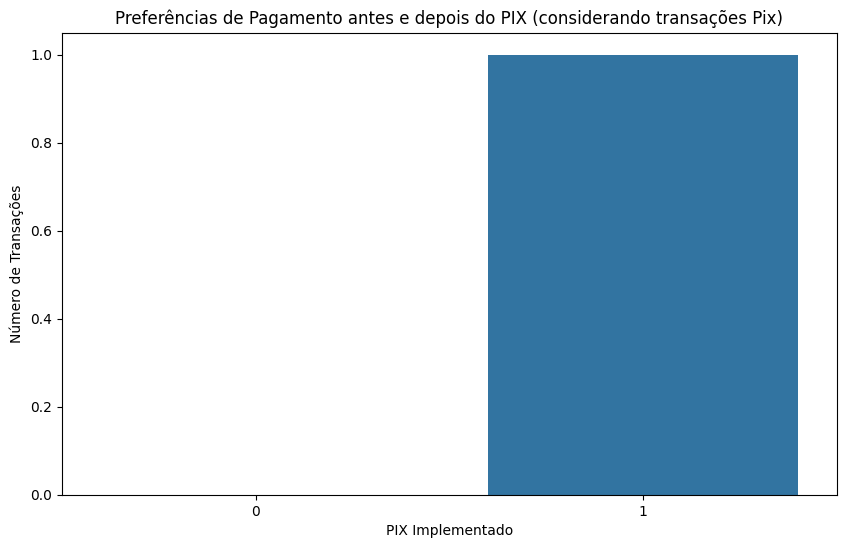

In [ ]:
# Plotar gráfico de barras empilhadas para comparar as preferências de pagamento
plt.figure(figsize=(10, 6))
sns.barplot(data=contagem_forma_pagamento, x='pix_implantado', y=contagem_forma_pagamento.index, ci=None)
plt.title('Preferências de Pagamento antes e depois do PIX (considerando transações Pix)')
plt.xlabel('PIX Implementado')
plt.ylabel('Número de Transações')
plt.show()

## Como o pix afetou a captação de novos clientes?

In [76]:
transacoes_pix = transacoes_df[transacoes_df['nome_transacao'].str.contains('Pix', case=False)]

In [77]:
# Unindo DataFrames de Transações, Contas e Clientes
transacoes_contas_clientes = pd.merge(transacoes_pix, contas_df, on='num_conta')
clientes_df = pd.merge(transacoes_contas_clientes, clientes_df, on='cod_cliente')

In [78]:
# 3. Analisando a Captação de Novos Clientes
clientes_antes_pix = clientes_df[clientes_df['data_inclusao'] < '2022-01-01']
clientes_depois_pix = clientes_df[clientes_df['data_inclusao'] >= '2022-01-01']

novos_clientes_antes_pix = len(clientes_antes_pix['cod_cliente'].unique())
novos_clientes_depois_pix = len(clientes_depois_pix['cod_cliente'].unique())

aumento_novos_clientes = novos_clientes_depois_pix - novos_clientes_antes_pix


# Imprima alguns dados intermediários para verificar
print("Número de clientes antes do Pix:", novos_clientes_antes_pix)
print("Número de clientes depois do Pix:", novos_clientes_depois_pix)

Número de clientes antes do Pix: 712
Número de clientes depois do Pix: 139


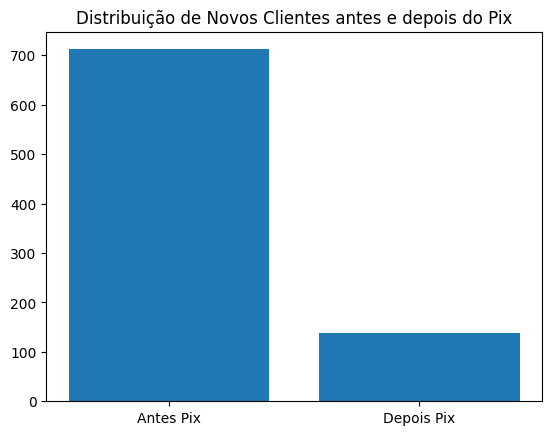

In [79]:
# Visualização de Dados
plt.bar(['Antes Pix', 'Depois Pix'], [novos_clientes_antes_pix, novos_clientes_depois_pix])
plt.title('Distribuição de Novos Clientes antes e depois do Pix')
plt.show()